In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

from PLred.visPLred import couplingmap as cm
import PLred.mapmodel as mm
import importlib
importlib.reload(cm)
importlib.reload(mm)
import pickle
import h5py
import json
from PLred.imageutils import show_voronoi

In [193]:
couplingmap_file = '/mnt/datazpool/PL/yjkim/remapped_voronoi/mizarA2_binned_20250514/voronoi_ini_08:23:58_08:36:59/remapped_voronoi_couplingmap.fits'

mapmodel = mm.VoronoiCouplingMapModel(mapdata = couplingmap_file, min_nframes = 5)

all_map_inputs, all_modeled_recons, all_modeled_coeffs, model_chi2 = mapmodel.make_polynomial_model(output_name = 'mizarA2_polymodel',
                               wav_fitrange = np.arange(200),
                               wav_reconrange = np.arange(200),
                               poly_deg_spatial = 9,
                               poly_deg_spectral = 7
                               )

loading mapdata
masking data with less than 5 frames


  0%|          | 0/38 [00:00<?, ?it/s]

100%|██████████| 38/38 [00:12<00:00,  3.02it/s]


mizarA2_polymodel.fits saved


In [16]:
couplingmap_file = '/mnt/datazpool/PL/yjkim/remapped_voronoi/mizarB2_20250514/voronoi_ini_08:38:33_08:55:52/remapped_voronoi_couplingmap.fits'

mapmodel = mm.VoronoiCouplingMapModel(mapdata = couplingmap_file, min_nframes = 5)

all_map_inputs, all_modeled_recons, all_modeled_coeffs, model_chi2 = mapmodel.make_polynomial_model(output_name = 'mizarB2_polymodel',
                               wav_fitrange = np.arange(200),
                               wav_reconrange = np.arange(200),
                               poly_deg_spatial = 9,
                               poly_deg_spectral = 7
                               )

loading mapdata
masking data with less than 5 frames


  8%|▊         | 3/38 [00:01<00:14,  2.33it/s]/home/first/yjkim/PLred/PLred/mapmodel.py:409: RuntimeWarning: divide by zero encountered in divide
  weight = 1/variance_map[:,specind]
100%|██████████| 38/38 [00:15<00:00,  2.42it/s]
/home/first/yjkim/PLred/PLred/mapmodel.py:904: RuntimeWarning: divide by zero encountered in divide
  self.model_chi2 = (all_map_inputs - all_modeled_recons)**2 / self.datanormvar[:,:,wav_reconrange]


mizarB2_polymodel.fits saved


In [17]:
mapmodel1 = mm.VoronoiCouplingMapModel(model = 'mizarB2_polymodel.fits')

loading model


In [3]:
mapmodel2 = mm.VoronoiCouplingMapModel(model = 'mizarA2_polymodel.fits')

loading model


In [4]:
mapmodel3 = mm.VoronoiCouplingMapModel(model = 'mizarA2_polymodel.fits',
                coeff_model='mizarB2_polymodel.fits')


loading model
Loading coefficients from separate model


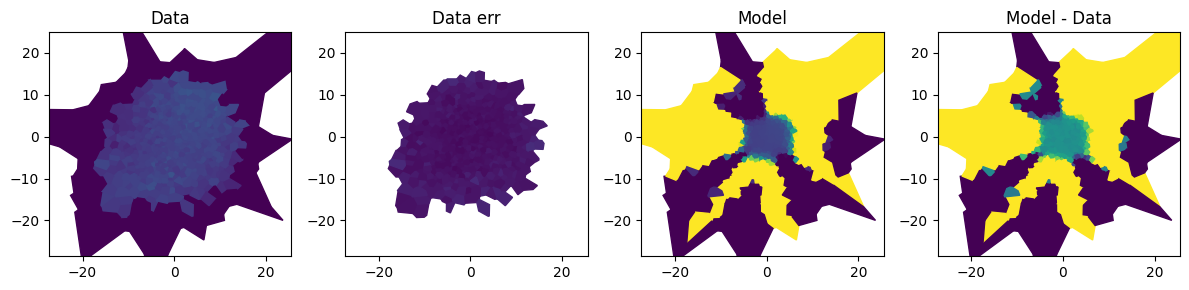

In [18]:
fig, axs = plt.subplots(ncols=4, figsize=(12,3))
specind = 100
fibind = 36

show_voronoi(mapmodel1.vor, (mapmodel1.normdata[:,fibind,specind]), ax=axs[0], vmin=0, vmax=0.01)
show_voronoi(mapmodel1.vor, np.sqrt(mapmodel1.datanormvar[:,fibind,specind]), ax=axs[1], vmin=0, vmax=0.003)
show_voronoi(mapmodel1.vor, (mapmodel1.compute_vec(specind, fibind, 0, 0)), ax=axs[2], vmin=0, vmax=0.01)
show_voronoi(mapmodel1.vor, (mapmodel1.compute_vec(specind, fibind, 0, 0) - mapmodel1.normdata[:,fibind,specind]), ax=axs[3], vmin=-0.005, vmax=0.005)

axs[0].set_title('Data')
axs[1].set_title('Data err')
axs[2].set_title('Model')
axs[3].set_title('Model - Data')
plt.tight_layout()

<Axes: >

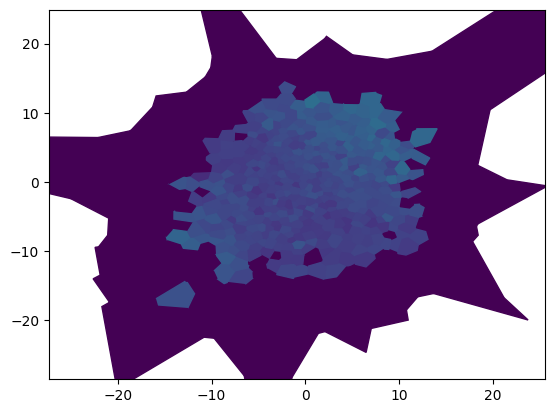

In [228]:
show_voronoi(mapmodel1.vor, (mapmodel1.normdata[:,37,100]), vmin=0, vmax=0.01)


<Axes: >

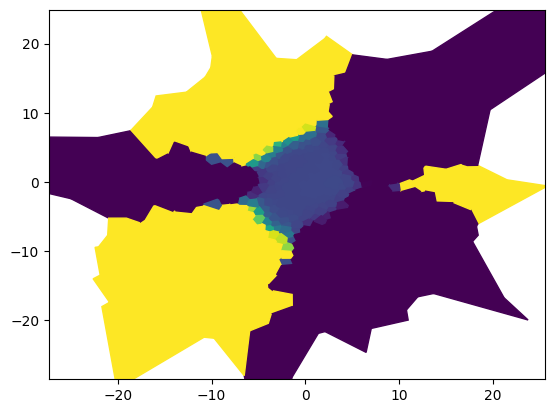

In [233]:
show_voronoi(mapmodel1.vor, (mapmodel1.compute_vec(195,37,0,0)), vmin=0, vmax=0.01)


<Axes: >

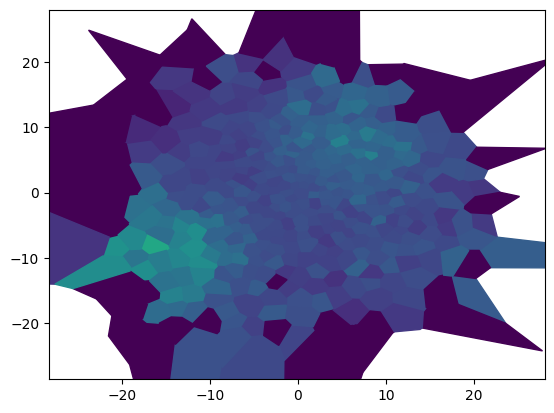

In [178]:
show_voronoi(mapmodel2.vor, (mapmodel2.normdata[:,37,100]), vmin=0, vmax=0.01)


<Axes: >

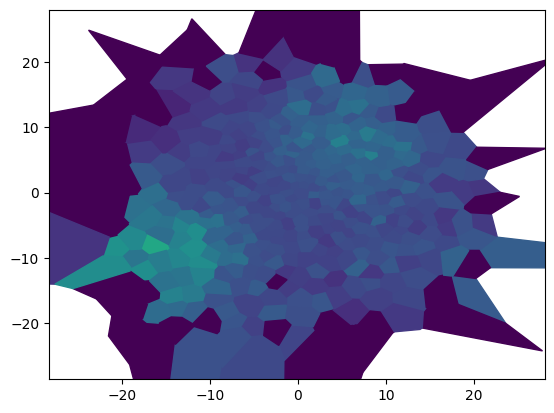

In [175]:
show_voronoi(mapmodel3.vor, (mapmodel3.normdata[:,37,100]), vmin=0, vmax=0.01)


<Axes: >

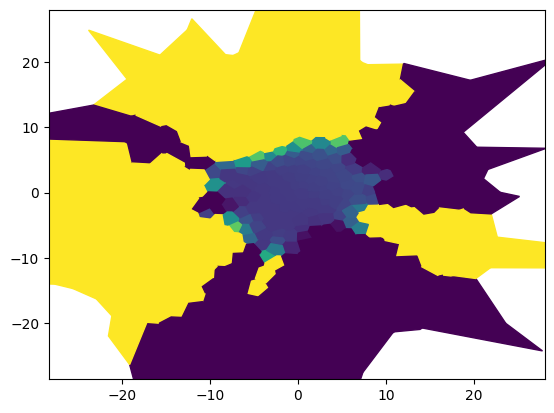

In [176]:
show_voronoi(mapmodel3.vor, mapmodel3.compute_vec(100, 37, 0, 0), vmin=0, vmax=0.01)


<Axes: >

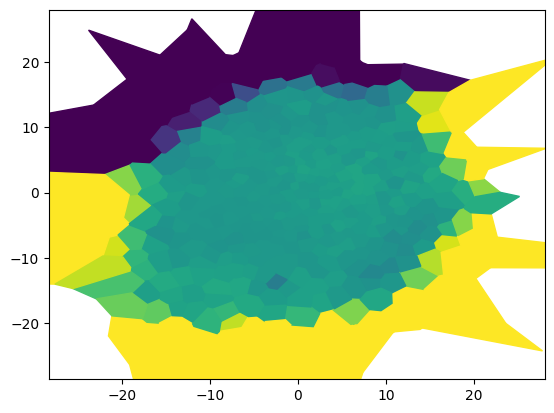

In [133]:
show_voronoi(mapmodel3.vor, (mapmodel3.normdata[:,2,100]) - mapmodel3.compute_vec(100,2,0,0), vmin=-0.01, vmax=0.01)


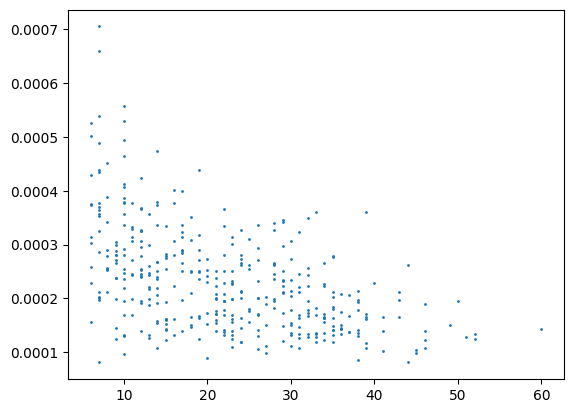

In [134]:
plt.plot(mapmodel2.numframes, np.sqrt(mapmodel2.datanormvar[:,2,100]),'o',ms=1)

In [135]:
filter_idx = mapmodel2.cluster_centers[:,0] ** 2 + mapmodel2.cluster_centers[:,1] ** 2 < 25**2
print(np.sum(filter_idx))

423


(0.0, 100.0)

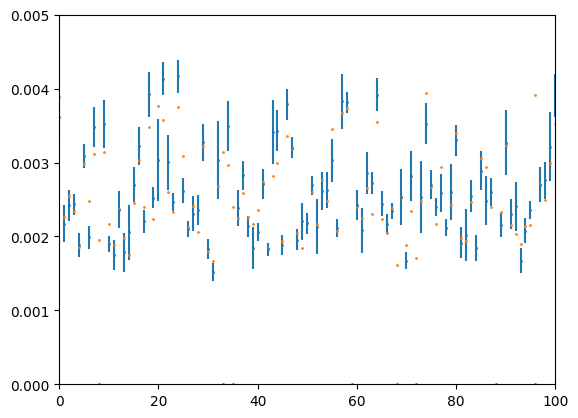

In [136]:
plt.errorbar(np.arange(len(mapmodel2.normdata[filter_idx])), mapmodel2.normdata[filter_idx,2,100], yerr = np.sqrt(mapmodel2.datanormvar[filter_idx,2,100]), fmt='o', ms=1)
plt.plot(mapmodel2.all_modeled_recons[filter_idx,2,100], 'o', ms=1)
plt.ylim([0,0.005])
plt.xlim([0,100])

1.4663140009387765


(0.0, 15.0)

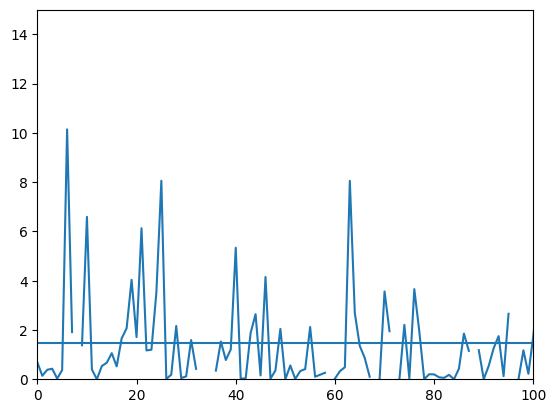

In [137]:
plt.plot(mapmodel2.chi2[filter_idx,2,100])
plt.axhline(np.nanmean(mapmodel2.chi2[filter_idx,2,100]))
print(np.nanmean(mapmodel2.chi2[filter_idx,2,100]))
plt.xlim([0,100])
plt.ylim([0,15])

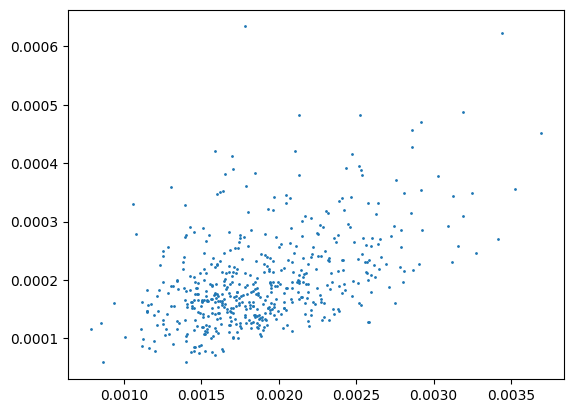

In [138]:
plt.plot(mapmodel1.normdata[:,2,100], np.sqrt(mapmodel1.datanormvar[:,2,100]),'o',ms=1)


(array([ 47., 190., 149.,  78.,  31.,  19.,   7.,   4.,   0.,   2.]),
 array([5.87143338e-05, 1.16255870e-04, 1.73797405e-04, 2.31338941e-04,
        2.88880477e-04, 3.46422012e-04, 4.03963548e-04, 4.61505084e-04,
        5.19046619e-04, 5.76588155e-04, 6.34129691e-04]),
 <BarContainer object of 10 artists>)

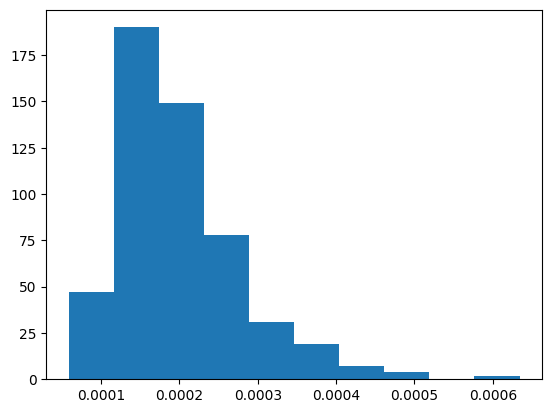

In [139]:
plt.hist(np.sqrt(mapmodel1.datanormvar[:,2,100]))

<Axes: >

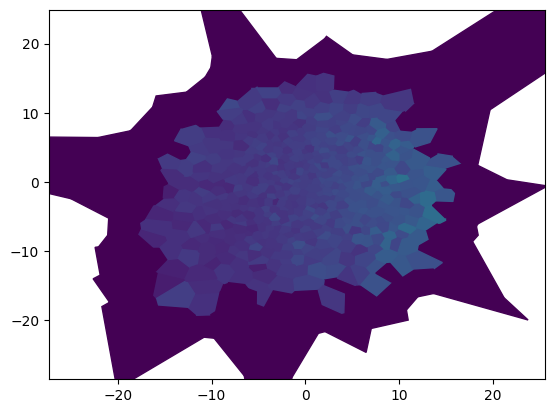

In [161]:
show_voronoi(mapmodel1.vor, ((mapmodel1.normdata[:,2,100])), vmin=0,vmax=0.01)

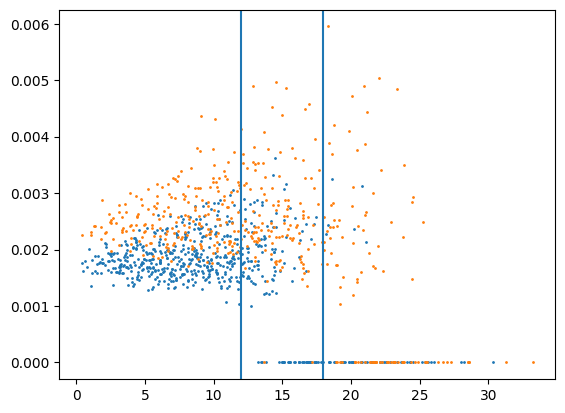

In [174]:
specind = 100
fibind = 37
plt.plot(np.sqrt(mapmodel1.cluster_centers[:,0]**2 + mapmodel1.cluster_centers[:,1]**2), (mapmodel1.normdata[:,fibind,specind]), 'o', ms=1)
plt.plot(np.sqrt(mapmodel2.cluster_centers[:,0]**2 + mapmodel2.cluster_centers[:,1]**2), (mapmodel2.normdata[:,fibind,specind]), 'o', ms=1)
plt.axvline(12)
plt.axvline(18)

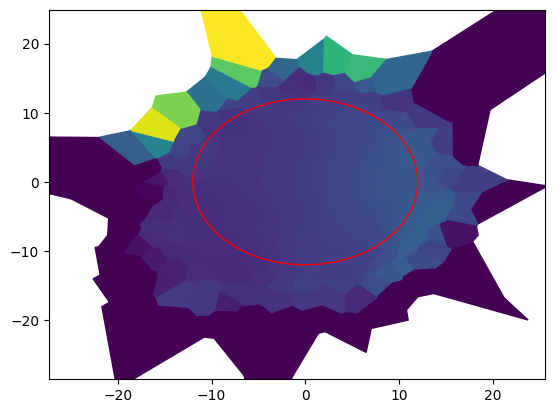

In [163]:
show_voronoi(mapmodel1.vor,mapmodel1.compute_vec(100,2,0,0), vmin=0,vmax=0.01)
cir = plt.Circle((0, 0), 12, color='r', fill=False)
plt.gca().add_artist(cir)

1.379809658081213


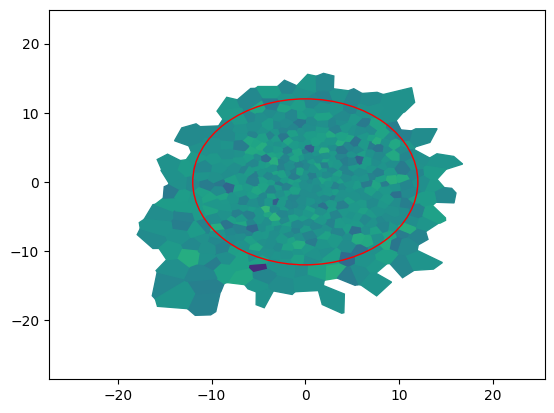

In [157]:
show_voronoi(mapmodel1.vor, ((mapmodel1.normdata[:,2,100]) - mapmodel1.compute_vec(100,2,0,0)) / np.sqrt(mapmodel1.datanormvar[:,2,100]), vmin=-10, vmax=10)
cir = plt.Circle((0, 0), 12, color='r', fill=False)
plt.gca().add_artist(cir)
print(np.nanmean(( ((mapmodel1.normdata[:,2,100]) - mapmodel1.compute_vec(100,2,0,0)) / np.sqrt(mapmodel1.datanormvar[:,2,100]))**2))

<Axes: >

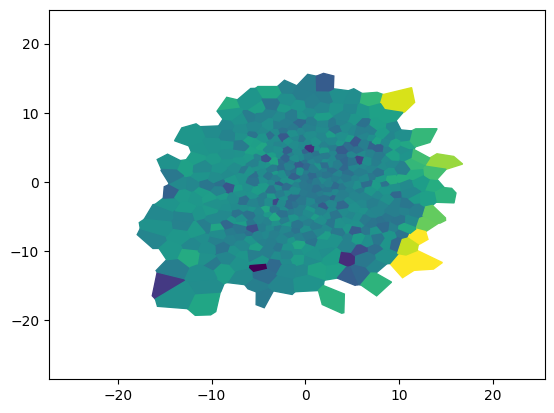

In [141]:
show_voronoi(mapmodel1.vor, ((mapmodel1.normdata[:,2,100]) - mapmodel1.compute_vec(100,2,3,0)) / np.sqrt(mapmodel1.datanormvar[:,2,100]), vmin=-10, vmax=10)


In [142]:
print(np.nanmean( ((mapmodel1.normdata[:,2,100]) - mapmodel1.compute_vec(100,2,0,0))**2 / (mapmodel1.datanormvar[:,2,100])))

1.379809658081213


<Axes: >

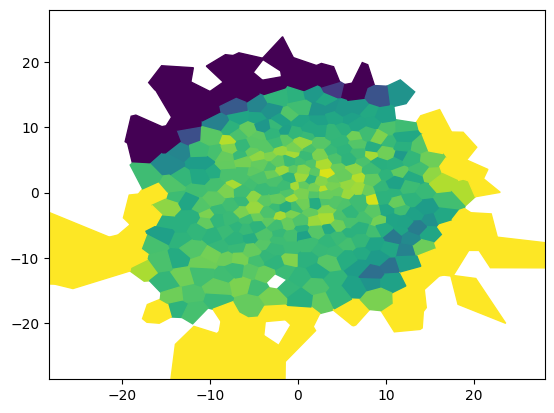

In [143]:
show_voronoi(mapmodel3.vor, ((mapmodel3.normdata[:,2,100]) - mapmodel3.compute_vec(100,2,0,0)) / np.sqrt(mapmodel3.datanormvar[:,2,100]), vmin=-10, vmax=10)


In [144]:
mapmodel2.datanormvar[:,0,100]

array([3.74019870e-08, 1.88180498e-07, 4.18977728e-08, 2.92056236e-08,
       2.28889480e-08, 7.31898511e-08, 7.83269627e-08, 1.21610866e-08,
                  nan, 4.96420725e-08, 1.68563852e-08, 2.65820875e-07,
       2.75566793e-08, 2.53152571e-07, 1.11787444e-07, 4.46483045e-08,
       1.13185245e-08, 5.61135907e-08, 2.92943228e-07, 4.10239347e-08,
       1.55891507e-07, 6.01871214e-08, 5.39077110e-08, 2.99323813e-08,
       2.37888899e-08, 2.05124061e-08, 2.63534376e-08, 1.46797135e-07,
       3.36873685e-08, 2.02343610e-08, 4.70238297e-08, 1.45144932e-07,
       3.16936008e-08,            nan, 7.92307074e-08,            nan,
       1.05707025e-07, 3.77692953e-08, 7.67469533e-08, 4.26522371e-07,
       8.20525724e-08, 9.01967960e-09, 1.07006355e-07, 7.95447494e-09,
       1.66118017e-07, 1.75576431e-08, 3.22991705e-08, 7.43895971e-09,
       1.67130026e-08, 1.42410782e-07, 3.25265456e-08, 3.32737222e-08,
       7.45967072e-08, 9.63264579e-08, 2.88743215e-08, 3.61200452e-08,
      

<Axes: >

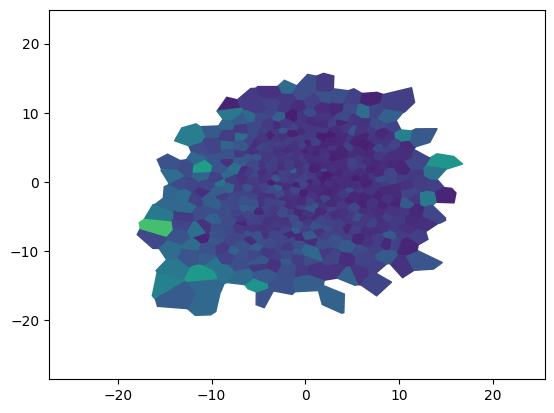

In [145]:
show_voronoi(mapmodel.vor, np.sqrt(mapmodel.datanormvar[:,0,100]), vmin=0, vmax=0.001)


In [ ]:
show_voronoi(mapmodel.vor, np.sqrt(mapmodel1.datanormvar[:,0,100]), vmin=0, vmax=0.001)
cir = plt.Circle((0, 0), 12, color='r', fill=False)
plt.gca().add_artist(cir)


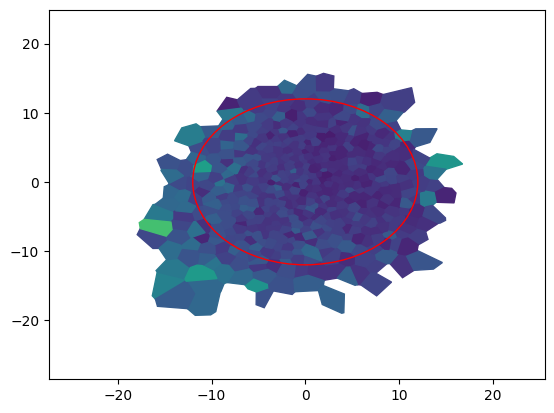

In [154]:
show_voronoi(mapmodel.vor, np.sqrt(mapmodel1.datanormvar[:,0,100]), vmin=0, vmax=0.001)
cir = plt.Circle((0, 0), 12, color='r', fill=False)
plt.gca().add_artist(cir)


In [ ]:
# image_ngrid = 15
# image_fov = 20
# mapmodel1.set_grid_param(image_ngrid, image_fov, 0)
# matrix= mapmodel1.make_matrix(100, np.arange(38))

225it [00:10, 20.77it/s]


In [12]:
mapmodel.numframes

array([27, 41, 14, 12, 40, 36,  8, 50, 19, 23, 21, 21, 25, 23, 11, 30, 43,
        3, 19, 23, 33, 23,  9, 15, 40,  3, 28, 13, 20, 33, 39, 17,  7, 11,
        5, 39, 30, 25, 28,  6, 32, 19,  8, 23, 32,  9, 11, 20,  8, 30,  8,
       24, 38, 15, 20,  3, 19, 20,  2, 12, 33, 25, 15, 11,  1, 37,  3,  4,
       23,  2, 45, 31, 31, 19, 21, 51, 29,  4, 17, 28, 23, 36, 41,  9, 13,
        5,  6, 22, 15,  8, 29,  6,  3, 27, 33, 47, 48, 25, 31,  3, 21, 33,
        2, 27, 27, 20, 31,  9, 21,  3, 24, 35, 19,  7,  9, 39, 24, 26,  3,
        1, 23, 11, 13, 28,  3, 19, 35, 20, 29,  6, 15, 21, 28, 25, 24, 39,
       16, 28,  9, 13, 12, 19, 11, 34, 33, 17, 27, 31, 29, 10, 48, 23,  9,
        3, 15,  5,  6, 36,  3,  4, 20, 14, 28,  5, 29,  3, 34, 30, 13, 43,
       16, 14, 22, 24, 42, 27, 15, 35,  4,  8, 34, 30, 19, 25,  5,  1, 14,
       29,  1, 19, 18,  9,  7,  3,  9, 17, 26, 31,  6, 28, 40, 15, 18, 20,
       34, 23, 52, 30, 32, 29, 54, 28, 37,  2,  3, 19, 18, 32, 31, 10, 11,
        8, 15, 41,  8, 25

In [42]:
mapmodel1.cluster_centers

array([[  4.67790459,   6.22243508],
       [ -1.52157286,  -0.03742507],
       [ -0.87974309, -10.12293501],
       ...,
       [  9.22984957,   0.32028584],
       [ -5.50041367, -10.54459351],
       [ -7.75372877,  -2.46516231]], shape=(617, 2))

(array([329.,  37.,  14.,   0.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([4.08073580e-07, 2.31407322e+00, 4.62814603e+00, 6.94221884e+00,
        9.25629165e+00, 1.15703645e+01, 1.38844373e+01, 1.61985101e+01,
        1.85125829e+01, 2.08266557e+01, 2.31407285e+01]),
 <BarContainer object of 10 artists>)

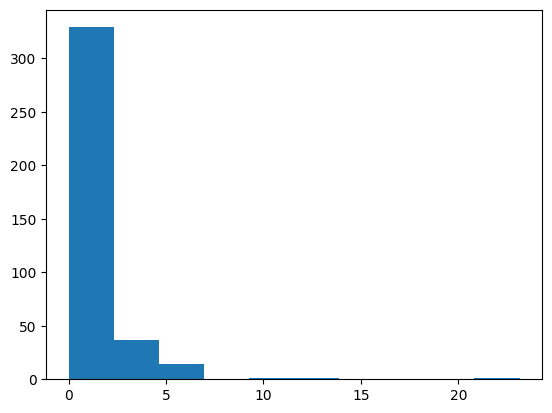

In [147]:
plt.hist(mapmodel2.chi2[:,0,100])

In [148]:
import PLred.fit as fit
importlib.reload(fit)
fitter = fit.PLMapFit(model_file = 'mizarB2_polymodel.fits',
                image_ngrid = 15, image_fov = 20, use_voronoi=True,
                fov_radius = 6)

loading model


In [149]:
fiber_inds = np.arange(38)
specind = 100
fitter.prepare_data(fiber_inds, specind)

FoV masking, eliminating 463 pixels


In [150]:
fitter.make_matrix(specind, fiber_inds)

225it [00:10, 20.61it/s]

all the fiber indices are used. saving the matrix to mat_full


100%|██████████| 500/500 [00:01<00:00, 297.33it/s]


Done
Final chi2 44.20085839655393


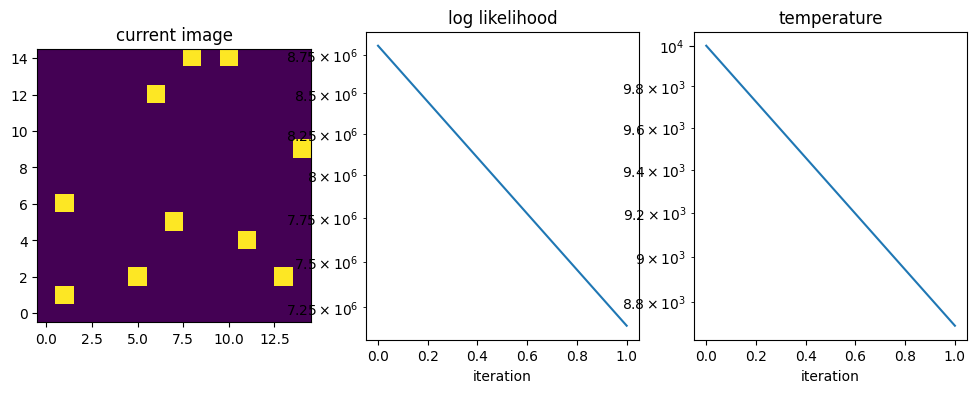

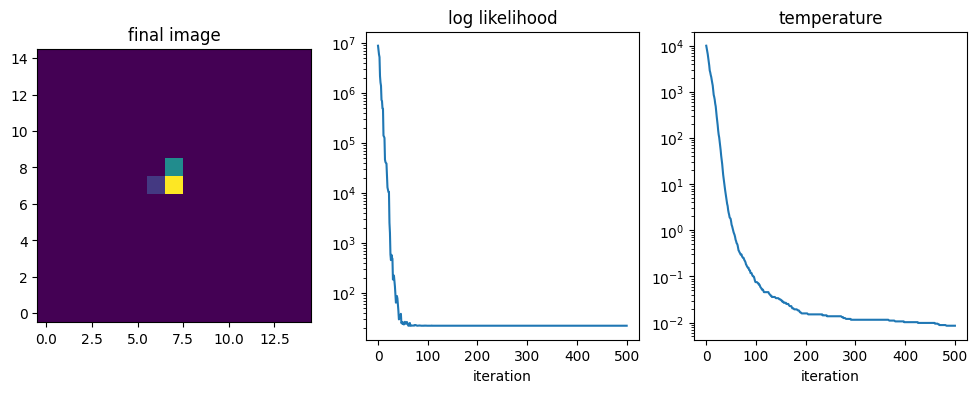

In [151]:
fitter.store_hyperparams(1e4, 3e5, 10000, 10, 0)
fitter.run(small_to_random_ratio = 1,radius = 20)

In [124]:
fitter.rc.lls[-10:]

[np.float64(27.832408228730923),
 np.float64(27.832408228730923),
 np.float64(27.832408228730923),
 np.float64(27.832408228730923),
 np.float64(27.832408228730923),
 np.float64(27.832408228730923),
 np.float64(27.832408228730923),
 np.float64(27.832408228730923),
 np.float64(27.832408228730923),
 np.float64(27.832408228730923)]

100%|██████████| 500/500 [00:01<00:00, 456.87it/s]


Done
Final chi2 1.6800147229532243


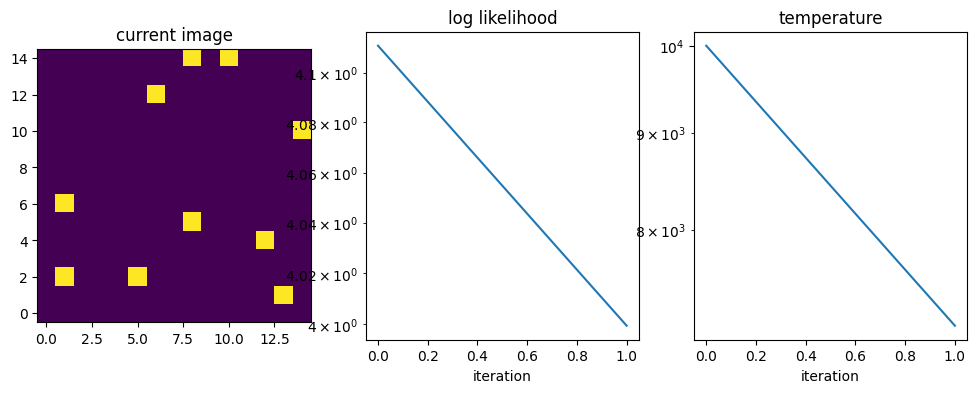

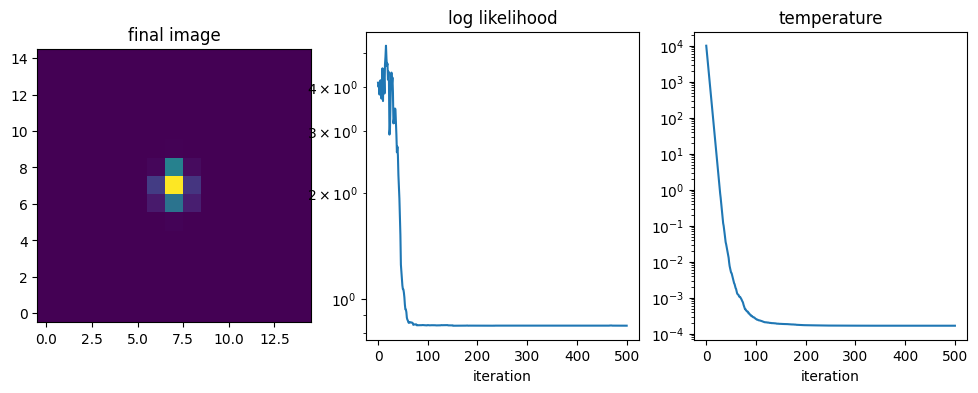

In [83]:
fitter.store_hyperparams(1e4, 3e5, 10000, 10, 0)
fitter.run(small_to_random_ratio = 1,radius = 20)

<Axes: >

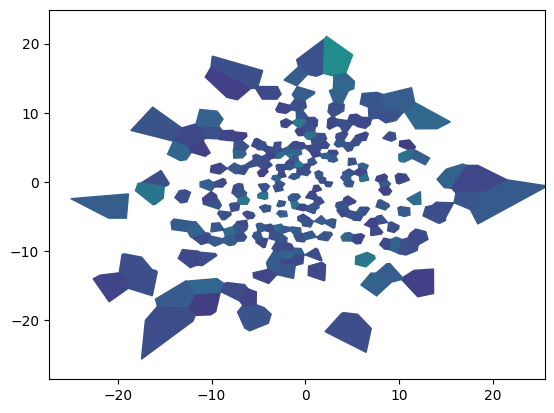

In [84]:
show_voronoi(mapmodel1.vor, fitter.observed, vmin=0,vmax=0.01)


<Axes: >

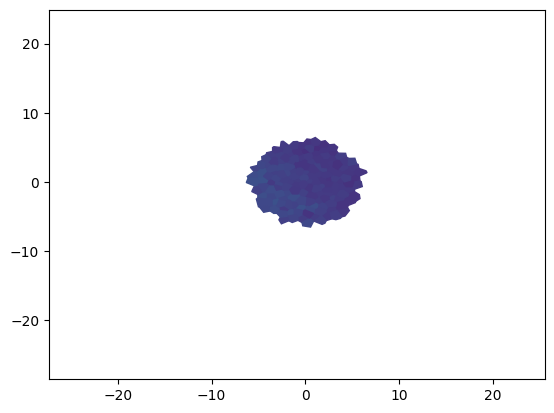

In [126]:
show_voronoi(mapmodel1.vor, fitter.observed, vmin=0,vmax=0.01)


In [22]:
np.nanmax(((fitter.observed - fitter.rc.final_vec) / (fitter.observed_err))**2)

np.float64(61.303969957564235)

In [23]:
np.nanmin(fitter.observed_err)

np.float64(0.0008429010824504737)

(array([3.000e+00, 6.000e+00, 3.000e+00, 5.500e+01, 6.724e+03, 7.542e+03,
        1.700e+02, 1.600e+01, 5.000e+00, 3.000e+00]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

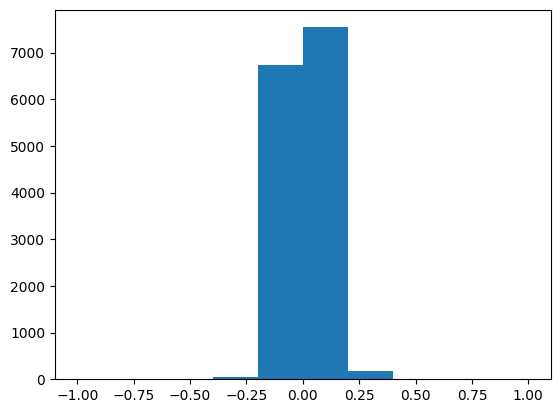

In [29]:
plt.hist((fitter.observed - fitter.rc.final_vec) / (fitter.observed_err), range=[-1,1])

<Axes: >

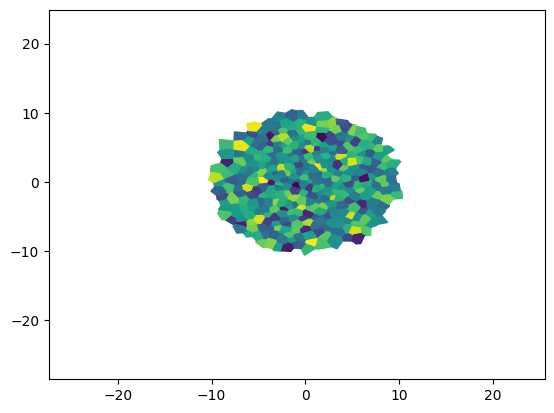

In [58]:
show_voronoi(mapmodel1.vor,(fitter.observed - fitter.rc.final_vec) / (fitter.observed_err), vmin=-3,vmax=3)

<Axes: >

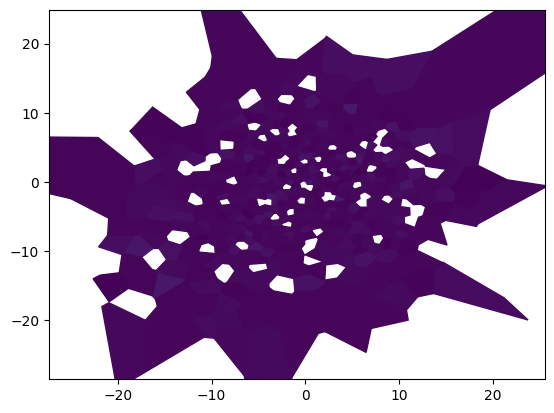

In [41]:
show_voronoi(mapmodel1.vor, fitter.observed_err, vmin=0,vmax=0.01)


<Axes: >

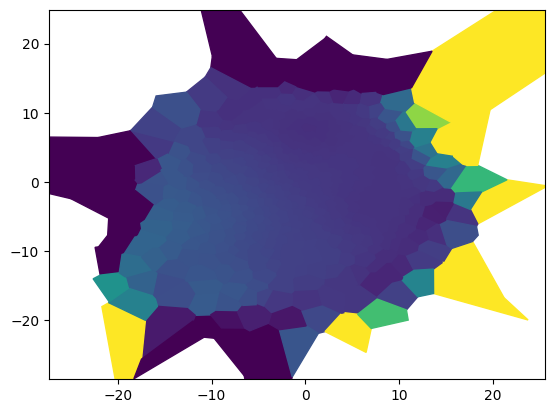

In [46]:
show_voronoi(mapmodel1.vor, fitter.rc.final_vec, vmin=0,vmax=0.01)

<Axes: >

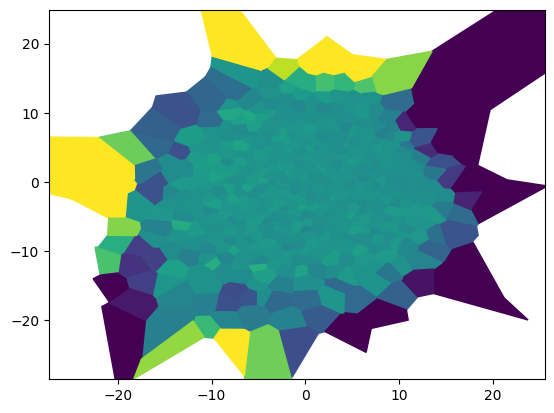

In [49]:
show_voronoi(mapmodel1.vor, fitter.observed - fitter.rc.final_vec, vmin=-0.005,vmax=0.005)


<Axes: >

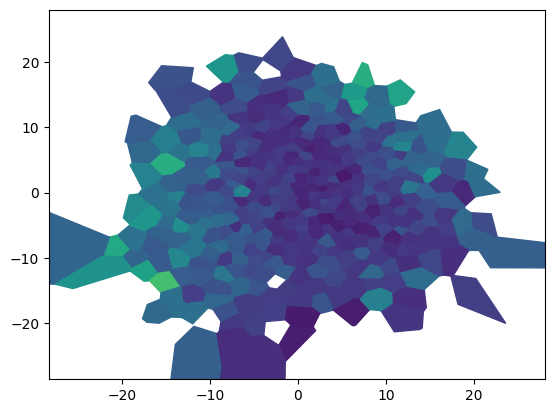

In [13]:
show_voronoi(mapmodel2.vor, np.sqrt(mapmodel2.datanormvar[:,0,100]), vmin=0, vmax=0.001)


<Axes: >

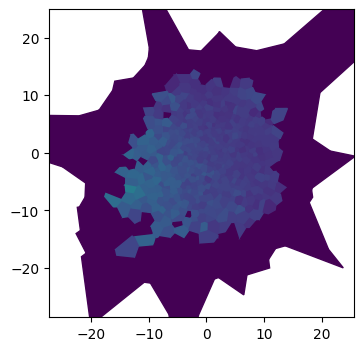

In [83]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, aspect='equal')
show_voronoi(mapmodel1.vor, mapmodel1.normdata[:,0,100], vmin=0, vmax=0.01, ax = ax)
# show_voronoi(mapmodel1.vor, mapmodel1.compute_vec(100,4,0,0), vmin=0, vmax=0.01, ax = ax)

In [108]:
modelfile = 'mizarA2_polymodel.fits'
np.shape(fits.getdata(modelfile)[0,0])

(55,)

In [103]:
mapmodel2.model_coeffs

NameError: name 'mapmodel2' is not defined

In [100]:
np.shape(all_modeled_coeffs)

(38, 200, 55)

<Axes: >

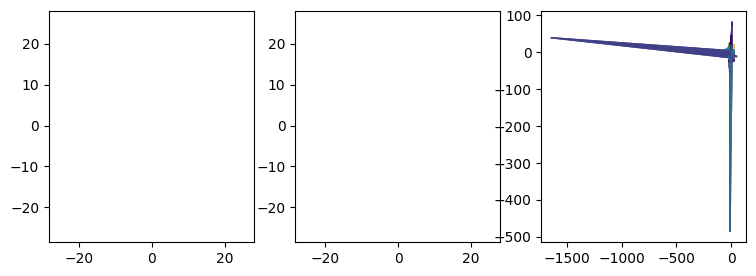

In [77]:
fig, axs = plt.subplots(ncols=3, figsize=(9,3))
show_voronoi(mapmodel.vor, all_map_inputs[:,0,100], minima=0,maxima=0.01, ax = axs[0])
show_voronoi(mapmodel.vor, all_modeled_recons[:,2,100], minima=0,maxima=0.01, ax = axs[1])


<Axes: >

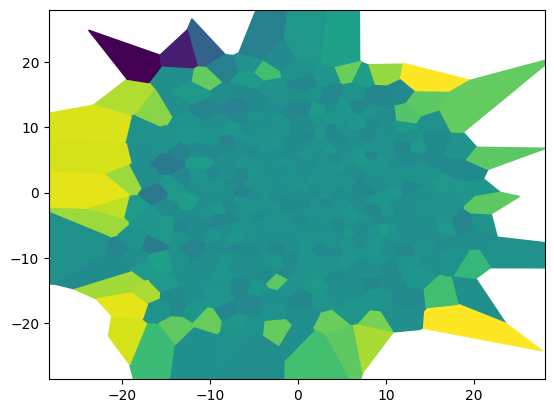

In [80]:
show_voronoi(mapmodel.vor, all_modeled_recons[:,5,100] - all_map_inputs[:,5,100], minima=-0.005,maxima=0.005)

<Axes: >

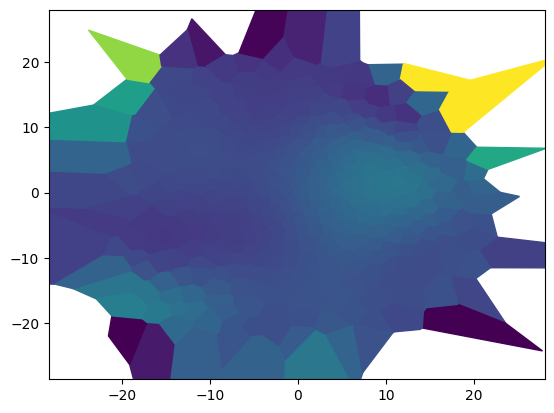

In [73]:
show_voronoi(mapmodel.vor, all_modeled_recons[:,2,100], minima=0,maxima=0.01)

In [56]:
np.shape(mapmodel.all_modeled_recons)

(200, 437, 38)

In [57]:
np.shape(np.transpose(mapmodel.datanormvar, axes = (1,2,0)))

(38, 700, 437)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

from PLred.visPLred import couplingmap as cm
import pickle
import h5py
import json

In [2]:
vor = pickle.load(open('/mnt/datazpool/PL/yjkim/remapped_voronoi/mizarA2_binned_20250514/voronoi_ini_08:23:58_08:36:59/voronoi.pkl', 'rb'))

In [3]:
vor

In [8]:
n_clusters = json.load(open('/mnt/datazpool/PL/yjkim/remapped_voronoi/mizarA2_binned_20250514/voronoi_ini_08:23:58_08:36:59/remapped_info.json', 'r'))['n_clusters']
mapfiles = [
    '/mnt/datazpool/PL/yjkim/remapped_voronoi/mizarA2_binned_20250514/voronoi_ini_08:23:58_08:36:59/remapped_voronoi_bin_%d.h5' % i for i in range(n_clusters)]
specfiles = [
    '/mnt/datazpool/PL/yjkim/remapped_voronoi/mizarA2_binned_20250514/voronoi_ini_08:23:58_08:36:59/remapped_voronoi_bin_%d_spec.h5' % i for i in range(n_clusters)]




In [6]:
xbins, ybins = [], []
nframes = []
for mapfile in mapfiles:
    with h5py.File(mapfile, 'r') as f:
        xbins.append(f.attrs['xbin'])
        ybins.append(f.attrs['ybin'])
        nframes.append(f.attrs['num_frames'])

19.839816933638446 11.98480991156607


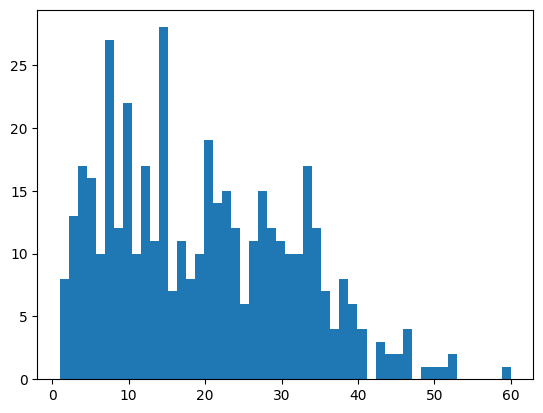

In [121]:
plt.hist(nframes, bins = 50)
print(np.average(nframes), np.std(nframes))

In [9]:
specs = []
bootspecs = []
for mapfile in specfiles:
    with h5py.File(mapfile, 'r') as f:
        specs.append(f['avgspec'][:])
        bootspecs.append(f['bootspecs'][:])

In [10]:
np.shape(specs)

(437, 38, 700)

In [12]:
np.shape(bootspecs)

(437, 20, 38, 700)

In [11]:
specs = np.array(specs)
bootspecs = np.array(bootspecs)

In [13]:
normspecs = specs / np.nansum(specs, axis=0)
normbootspecs = bootspecs / np.nansum(bootspecs, axis=0)

In [19]:
normspecs_var = np.nanvar(normbootspecs, axis=1)


/tmp/ipykernel_558702/159431977.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice.
  normspecs_var = np.nanvar(normbootspecs, axis=1)


In [20]:
def make_interpolation_model_irregular(normcube, points_x, points_y, wav_fitrange, wav_reconrange, 
                             poly_deg_spatial = 7, poly_deg_spectral = 7,
                             variance_map = None, weighted = True):
    '''
    Make a polynomial interpolation model for the coupling map data.

    Parameters
    ----------
    normcube : np.ndarray
        normalized cube data with shape (n_x, n_y, n_wav)
    pos_mas : np.ndarray
        positions in milliarcseconds (mas) for the spatial grid
    wav_fitrange : list
        wavelength range for fitting the polynomial
    wav_reconrange : list
        wavelength range for reconstructing the polynomial
    poly_deg_spatial : int
        degree of the polynomial in spatial direction
    poly_deg_spectral : int
        degree of the polynomial in spectral direction
    variance_map : np.ndarray, optional
        variance map for weighted least squares, should have the same shape as normcube
    weighted : bool
        if True, use weighted least squares

    Returns
    -------
    modeled_coeffs : np.ndarray
        coefficients of the polynomial model with shape (n_wav, n_coeffs)
    modeled_recon : np.ndarray
        reconstructed data with shape (n_x, n_y, n_wav)
    all_map_input : np.ndarray
        input data for the polynomial model with shape (n_x, n_y, n_wav)
    '''

    if weighted is True: assert variance_map is not None, "for weighted least squares, variance map should be given"

    all_recon_data, all_map_input, all_coeffs = [], [], []

    # x_grid, y_grid = np.meshgrid(pos_mas, pos_mas)

    # x_flat = x_grid.ravel()
    # y_flat = y_grid.ravel()

    from PLred.mapmodel import poly_design_matrix
    from scipy.linalg import lstsq
    
    X_poly = poly_design_matrix(points_x, points_y, poly_deg_spatial)

    _wav_fitrange_inds = []
    for ii, specind in enumerate(wav_reconrange):
        # iterate over the spectral indices in the recon range

        map_data = normcube[:,specind] # cube[:,:,specind] / np.nansum(cube[:,:,specind])
        weight = 1/variance_map[:,specind]
        idx = ~np.isfinite(map_data)
        map_data[idx] = 0
        weight[idx] = 0

        reshaped_data = map_data.ravel()
        
        if weighted:
            reshaped_weights = weight.ravel() #* 0 + 1.0
        else:
            reshaped_weights = np.ones_like(reshaped_data)



        X_poly_weighted = X_poly * np.sqrt(reshaped_weights[:,np.newaxis])
        b_weighted = reshaped_data * np.sqrt(reshaped_weights)

        coeffs, _, _, _ = lstsq(X_poly_weighted, b_weighted)
        
        recon = np.dot(X_poly, coeffs)

        # reshape to match the cube
        # recon = recon.reshape((len(pos_mas), len(pos_mas)))
        # map_input = reshaped_data.reshape((len(pos_mas), len(pos_mas)))

        all_recon_data.append(recon)
        all_map_input.append(reshaped_data)
        
        # store the coefficients
        all_coeffs.append(coeffs)
        if specind in wav_fitrange:
            _wav_fitrange_inds.append(ii)
    
    _wav_fitrange_inds = np.array(_wav_fitrange_inds)

    all_coeffs = np.array(all_coeffs)
    modeled_coeffs = np.zeros_like(all_coeffs)

    _wav_reconrange_inds = []
    for ii, coeff_ind in enumerate(range(np.shape(all_coeffs)[1])):
        # polynomial fit of the coefficients along the wavelength range (fitrange) and store the interpolated coefficients in reconrange
        poly = np.polyfit(wav_fitrange, all_coeffs[_wav_fitrange_inds,coeff_ind], deg = poly_deg_spectral)
        modeled_coeff = np.poly1d(poly)(wav_reconrange)
        modeled_coeffs[:,coeff_ind] = modeled_coeff
        _wav_reconrange_inds.append(ii)

    modeled_recon = []
    for ii, specind in enumerate(wav_reconrange):
        # compute the modeled reconstruction for each spectral index in the recon range
        recon = np.dot(X_poly, modeled_coeffs[ii])
        # recon = np.dot(X_poly, modeled_coeffs[specind])
        modeled_recon.append(recon)#.reshape((len(pos_mas), len(pos_mas))))

    modeled_recon = np.array(modeled_recon)

    all_map_input = np.array(all_map_input)

    # # fill in the missing values
    # missing_indices_x = np.where(idx == True)[0]
    # missing_indices_y = np.where(idx == True)[1]

    # for (mx, my) in zip(missing_indices_x, missing_indices_y):
    #     (all_map_input)[:,mx, my] = modeled_recon[:,mx, my]

    return modeled_coeffs, modeled_recon, all_map_input





In [ ]:
class VoronoiCouplingMapModel(CouplingMapModel):

    def __init__(self, mapdata = None, model = None,
                 min_nframes = 5):

        '''
        Initialize the CouplingMapModel class.
        Either loads the mapdata fits file or the model fits file.
            
        Parameters
        ----------
        mapdata : str, optional
            path to the mapdata fits file
        model : str, optional
            path to the model fits file
        min_nframes : int, optional
            minimum number of frames to consider a pixel valid, default is 5
        '''
        self.data = None
        self.datavar = None
        self.datanormvar = None

        if mapdata is not None:
            print("loading mapdata")
            self.map_fits = fits.open(mapdata)

            self.data = self.map_fits[0].data
            self.map_header = self.map_fits[0].header
            self.numframes = self.map_fits[1].data
            self.datavar = self.map_fits[3].data
            self.datanormvar = self.map_fits[4].data
            self.cluster_centers = self.map_fits[6].data
            self.cluster_centers = np.column_stack((self.cluster_centers['xbin'], self.cluster_centers['ybin']))
            # self.map_n = self.map_header['MAP_N']

            print("masking data with less than {} frames".format(min_nframes))
            self.min_nframes = min_nframes
            idx = self.numframes > min_nframes
            self.mask = idx
            self.data[~idx] = np.nan
            self.datavar[~idx] = np.nan
            self.datanormvar[~idx] = np.nan

            self.normdata = self.data / np.nansum(self.data, axis=(0))[None,:]
            self.nfib = self.normdata.shape[1]
        
        if model is not None:
            print("loading model")
            self.model_fits = fits.open(model)
            self.model_coeffs = self.model_fits[0].data
            self.model_header = self.model_fits[0].header
            self.normdata = self.model_fits[1].data
            self.datavar = self.model_fits[2].data
            self.datanormvar = self.model_fits[3].data
            self.cluster_centers = self.map_fits[4].data
            self.cluster_centers = np.column_stack((self.cluster_centers['xbin'], self.cluster_centers['ybin']))
            self.chi2 = self.model_fits[5].data
            # self.pos_mas = np.linspace(self.model_header['XMIN'], self.model_header['XMAX'], self.model_header['MAP_N'])
            # self.map_n = self.model_header['MAP_N']
            self.nfib = self.normdata.shape[2]

            self.x_flat = self.cluster_centers[:,0]
            self.y_flat = self.cluster_centers[:,1]

            X_poly = poly_design_matrix(self.x_flat, self.y_flat, self.model_header['NPOLY1'])
            self.wav_reconrange = np.arange(self.model_header['MIN_WAV'], self.model_header['MAX_WAV']+1)
            self.all_modeled_recons = np.zeros((len(self.cluster_centers), self.nfib, len(self.wav_reconrange)))
            
            for fibind in range(self.nfib):
                for specind in range(len(self.wav_reconrange)):
                    coeffs = self.model_coeffs[fibind, specind]
                    recon = np.dot(X_poly, coeffs)
                    self.all_modeled_recons[:,fibind,specind] = recon
    
    def make_polynomial_model(self, output_name,
                              wav_fitrange, wav_reconrange,
                              poly_deg_spatial = 9,
                              poly_deg_spectral = 9,
                              weighted = True):
        
        all_modeled_coeffs, all_modeled_recons, all_map_inputs = [], [] ,[]

        for fibind in tqdm(range(self.nfib)):

            modeled_coeffs, modeled_recon, all_map_input = make_interpolation_model_irregular(self.normdata[:,:,fibind,:], 
                                                                                    self.cluster_centers[:,0],
                                                                                    self.cluster_centers[:,1],
                                                                                    wav_fitrange = wav_fitrange, 
                                                                                    wav_reconrange = wav_reconrange, 
                                                                                    poly_deg_spatial = poly_deg_spatial,
                                                                                    poly_deg_spectral = poly_deg_spectral,
                                                                                    variance_map= self.datanormvar[:,:,fibind,:],
                                                                                    weighted = weighted)
            
            all_modeled_coeffs.append(modeled_coeffs)
            all_modeled_recons.append(modeled_recon)
            all_map_inputs.append(all_map_input)

        all_modeled_coeffs = np.array(all_modeled_coeffs)
        all_modeled_recons = np.array(all_modeled_recons)
        all_map_inputs = np.array(all_map_inputs)

        all_modeled_recons = np.transpose(all_modeled_recons, axes = (2,3,0,1))
        all_map_inputs = np.transpose(all_map_inputs, axes = (2,3,0,1))

        self.all_modeled_recons = all_modeled_recons

        # compute chi2
        self.model_chi2 = (all_map_inputs - all_modeled_recons)**2 / self.datanormvar[:,:,:,wav_reconrange]


        if output_name is not None:
            hdu = fits.PrimaryHDU(all_modeled_coeffs)
            hdu.header['NFIB'] = self.nfib
            # hdu.header['XMIN'] = min(self.pos_mas)
            # hdu.header['XMAX'] = max(self.pos_mas)
            # hdu.header['MAP_N'] = len(self.pos_mas)
            hdu.header['NPOLY1'] = poly_deg_spatial
            hdu.header['NPOLY2'] = poly_deg_spectral
            hdu.header['WEIGHTED'] = weighted
            hdu.header['EXTNAME'] = 'coeffs'
            hdu.header['MIN_WAV'] = min(wav_reconrange)
            hdu.header['MAX_WAV'] = max(wav_reconrange)

            ## adding mask here
            mask = ~np.isnan(self.datavar[:,:,:,wav_reconrange])

            hdu2 = fits.ImageHDU(all_map_inputs * mask)
            hdu2.header['EXTNAME'] = 'data'

            hdu3 = fits.ImageHDU(self.datavar[:,:,:,wav_reconrange] * mask)
            hdu3.header['EXTNAME'] = 'var'

            hdu4 = fits.ImageHDU(self.datanormvar[:,:,:,wav_reconrange] * mask)
            hdu4.header['EXTNAME'] = 'normvar'

            hdu5 = self.map_fits[4].copy()
            hdu5.header['EXTNAME'] = 'cluster_centers'

            hdu6 = fits.ImageHDU(self.model_chi2)
            hdu6.header['EXTNAME'] = 'chi2'

            hdulist = fits.HDUList([hdu, hdu2, hdu3, hdu4, hdu5, hdu6])
            hdulist.writeto(output_name+'.fits', overwrite=True)
            print(output_name+'.fits saved')

        self.all_map_inputs = all_map_inputs
        self.all_modeled_coeffs = all_modeled_coeffs

        self.wav_reconrange = wav_reconrange
        self.wav_fitrange = wav_fitrange
        
        return all_map_inputs, all_modeled_recons, all_modeled_coeffs, self.model_chi2



In [ ]:


mv = np.empty((n_clusters,testvals.shape[0]),dtype=float)
for i in range(n_clusters):
    # w = np.nonzero(kmeans.labels_ == i)[0]

    if filter_idx[i]:
        mv[i,:] = testvals[:,i]
    else:
        mv[i,:] = np.nan


In [44]:
specs[0]

array([[1678.35343916, 1728.8927951 , 1654.00812832, ...,           nan,
         365.52860844,  394.88283998],
       [1264.61305853, 1263.47468652, 1217.31378646, ...,  641.26521058,
         594.9571475 ,  598.94856816],
       [1205.10979274, 1274.79338106, 1205.09672094, ...,  373.77465387,
         352.04990207,  345.01005148],
       ...,
       [ 687.82181941,  700.07559741,  650.55888218, ...,  351.16352465,
         369.06277656,  358.10745936],
       [ 588.8689102 ,  575.53149954,  578.91802694, ...,  250.69924504,
         230.4436178 ,  244.94137531],
       [1542.90878851, 1493.8844914 , 1472.24946487, ...,  545.12885486,
         553.01060297,  518.12787967]], shape=(38, 700))

In [ ]:
normspecs = np.

In [30]:
def polygon_area(vertices):
    x = vertices[:, 0]
    y = vertices[:, 1]
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

def voronoi_areas(vor):
    areas = []
    for region_index in vor.point_region:
        region = vor.regions[region_index]
        if -1 in region or len(region) == 0:
            # Infinite region
            areas.append(np.nan)
            continue
        polygon = np.array([vor.vertices[i] for i in region])
        areas.append(polygon_area(polygon))
    return areas

(array([ 16., 193.,  64.,  45.,  29.,  24.,  11.,   9.,   2.,   4.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

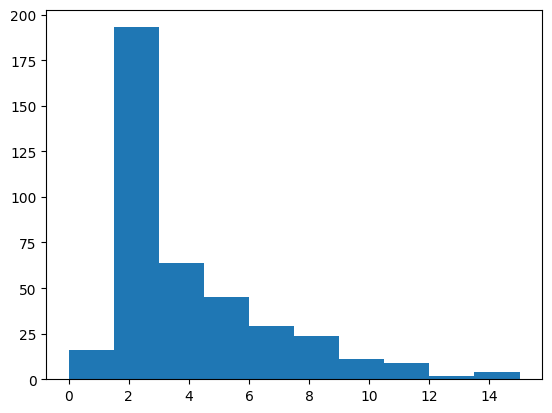

In [38]:
plt.hist(voronoi_areas(vor), range=[0,15])

In [87]:
areas = np.array(voronoi_areas(vor))

filter_idx = np.array(areas) < 15

In [88]:
np.shape(areas)

(437,)

In [90]:
np.shape(areas[filter_idx])

(397,)

In [91]:
testvals = specs[:,:,350].copy().T

In [123]:
np.shape(specs)

(437, 38, 700)

In [ ]:
mv = np.empty((n_clusters,38, 200),dtype=float)

for specind in range(200):
    vals = specs[:,:,specind].T
    for i in range(n_clusters):
        
        mv[i,:,specind] = specs[:,i]



In [129]:
np.shape(specs)

(437, 38, 700)

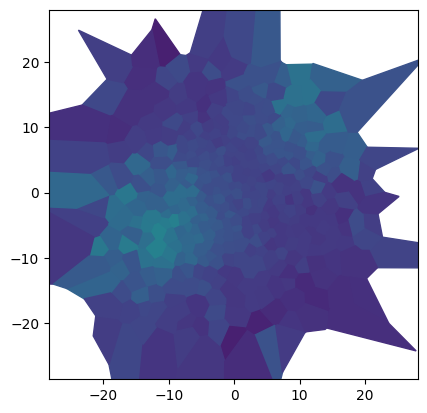

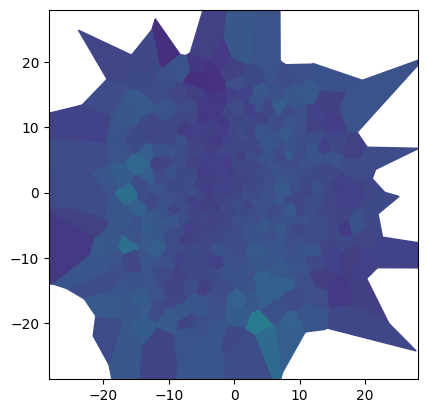

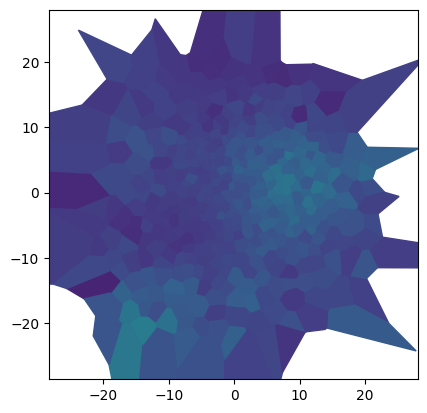

In [134]:
for i in range(3):
    ax = show_voronoi(vor, specs[:,i,100] / np.nansum(specs[:,i,100]),
                      minima = 0, maxima = 0.01)
    ax.set_aspect('equal')
    # ax.set_xlim([medpoint[0]-1.5, medpoint[0]+1.5])
    # ax.set_ylim([medpoint[1]-1.5, medpoint[1]+1.5])
    plt.show()

In [137]:
# np.shape(specs)
normspecs = specs / np.nansum(specs, axis=0)[None,:]

In [141]:
type(xbins)

list

In [21]:
modeled_coeffs, modeled_recon, all_map_input = make_interpolation_model_irregular(
                        normspecs[:,0,:200], 
                        points_x = np.array(xbins),
                        points_y = np.array(ybins),
                        wav_fitrange = np.r_[0:200], 
                        wav_reconrange = np.r_[0:200],
                        poly_deg_spatial = 9,
                        poly_deg_spectral = 9,
                        variance_map= normspecs_var[:,0,:200],
                        weighted = True)

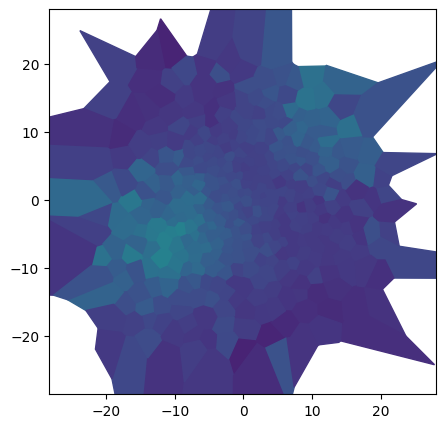

In [145]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def animate(specind):
    ax.clear()
    show_voronoi(vor, normspecs[:,0,specind], ax, minima = 0, maxima = 0.01)
    

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

anim = FuncAnimation(fig, animate, frames=np.arange(90,200, 10), interval=100)
HTML(anim.to_jshtml())

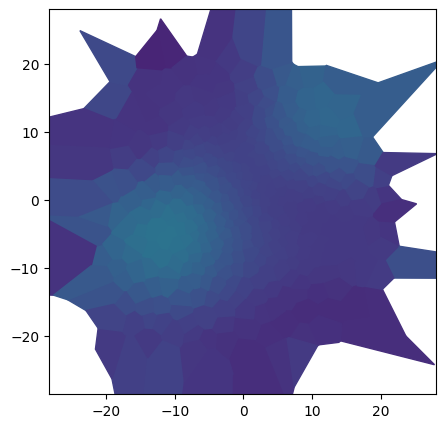

In [22]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def animate(specind):
    ax.clear()
    show_voronoi(vor, modeled_recon[specind], ax, minima = 0, maxima = 0.01)
    

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

anim = FuncAnimation(fig, animate, frames=np.arange(90,200, 10), interval=100)
HTML(anim.to_jshtml())

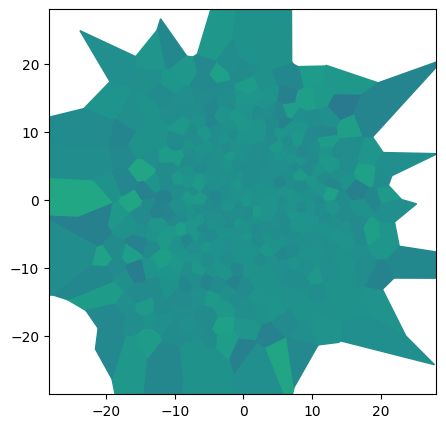

In [148]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def animate(specind):
    ax.clear()
    show_voronoi(vor, normspecs[:,0,specind]- modeled_recon[specind], ax, minima = -0.005, maxima = 0.005)
    

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

anim = FuncAnimation(fig, animate, frames=np.arange(90,200, 10), interval=100)
HTML(anim.to_jshtml())

In [146]:
np.shape(modeled_recon)

(200, 437)

In [93]:
mv = np.empty((n_clusters,testvals.shape[0]),dtype=float)
for i in range(n_clusters):
    # w = np.nonzero(kmeans.labels_ == i)[0]

    if filter_idx[i]:
        mv[i,:] = testvals[:,i]
    else:
        mv[i,:] = np.nan


<Axes: >

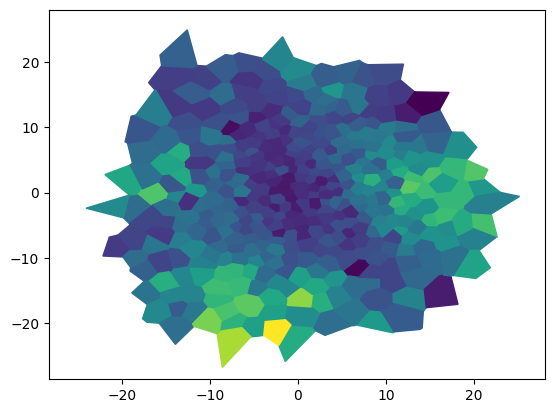

In [94]:
show_voronoi(vor, mv[:,6])#, minima = 10, maxima=100)

In [95]:
np.shape(specs)

(437, 38, 700)

In [105]:
areas = np.array(voronoi_areas(vor))
filter_idx = np.array(areas) < 15

masked_areas = areas.copy()
masked_areas[np.where(filter_idx == False)[0]] = np.nan

In [106]:
masked_areas

array([ 2.30469404,  3.33855639,  1.88320676,  1.97267507,  2.02356026,
        2.43332843,  4.75880727,  2.85700442,  8.92606103,  1.37683802,
        2.08387057,  8.31653195,  5.93450413,  6.55208491,  4.85936881,
        4.1419092 ,  1.73696057,  1.75869603,  4.16013093,  2.66441287,
        4.56795726,  2.0325595 ,  5.84373733,  3.87815759,  2.24747704,
        2.12757363,  1.78880236, 10.20711842,  3.6436098 ,  2.06685238,
        6.78687759,  3.84772002,  5.75006259,         nan,  1.96671669,
        8.34094068,  4.97078985,  4.04112535,  1.89862086,  6.89483711,
        3.23611399,  1.71136206,  2.22116872, 11.75314876,  2.76435464,
        3.31289034,  2.44921569,  1.01070944,  2.48586511,  3.62611848,
        2.26344726,  1.67009274, 14.37039947,  3.46916612,  4.05235276,
        2.11806919,         nan,         nan,  4.61072426,  2.38855158,
               nan,  1.66759556,  8.40864692,  3.1790736 ,  1.79469713,
        2.09905255,  1.84316275,  2.5291983 ,  2.14733317,  7.21

In [15]:
from scipy.spatial import Voronoi, voronoi_plot_2d

def show_voronoi(vor, vv, ax=None, minima = None, maxima = None):
    if ax is None:
        ax = plt.subplot(111)
    # find min/max values for normalization
    if minima is None: minima = min(vv)
    if maxima is None: maxima = max(vv)
    
    # normalize chosen colormap
    import matplotlib as mpl
    import matplotlib.cm as cm
    norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, 
                               #cmap=cm.Blues_r,
                            #    cmap=cm.gray,
                              )
    
    # plot Voronoi diagram, and fill finite regions with color mapped from speed value
    voronoi_plot_2d(vor, ax=ax,
                    #show_points=True, 
                    show_points=False,
                    show_vertices=False, 
                    line_width=0,
                    s=1,
                    origin='upper'
                    )
    for r in range(len(vor.point_region)):
        region = vor.regions[vor.point_region[r]]
        if not -1 in region:
            polygon = [vor.vertices[i] for i in region]
            plt.fill(*zip(*polygon), color=mapper.to_rgba(vv[r]))
    #plt.show()
    return ax


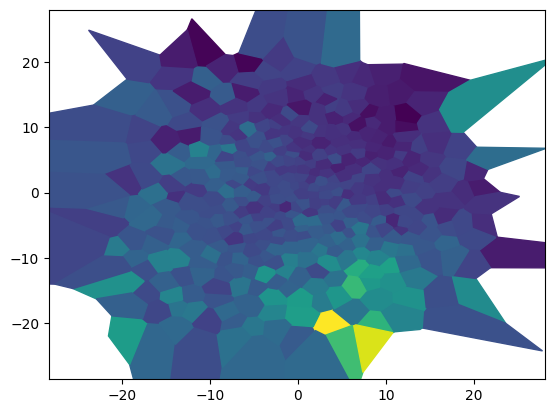

In [16]:

ax = show_voronoi(vor, normspecs[:,4,350])

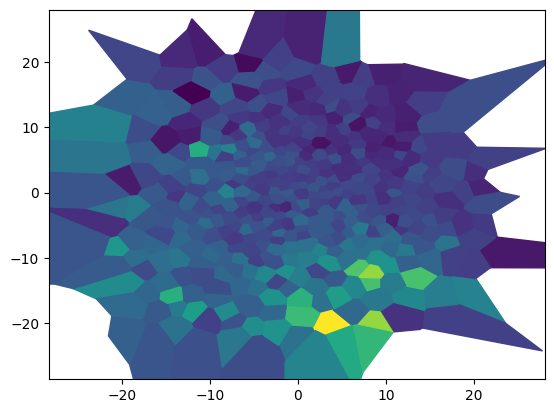

In [18]:
ax = show_voronoi(vor, normbootspecs[:,10,4,350])


In [107]:
np.shape(specs[:,4,350])

(437,)

In [109]:
np.shape(specs[:,4,350])

(437,)

In [110]:
np.shape(masked_areas)

(437,)

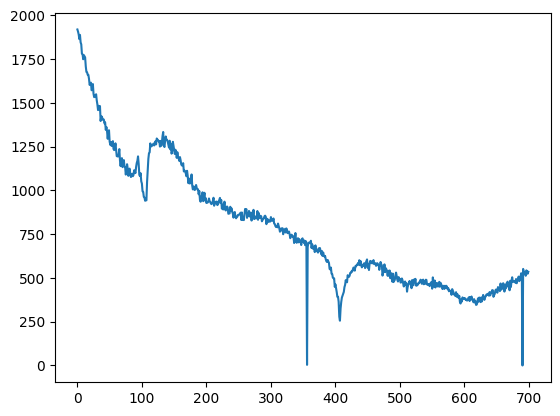

In [115]:
sums = []
for specind in range(700):
    sums.append(np.nansum(specs[:,4,specind] * masked_areas) / np.nansum(masked_areas))

sums = np.array(sums)
plt.plot(sums)

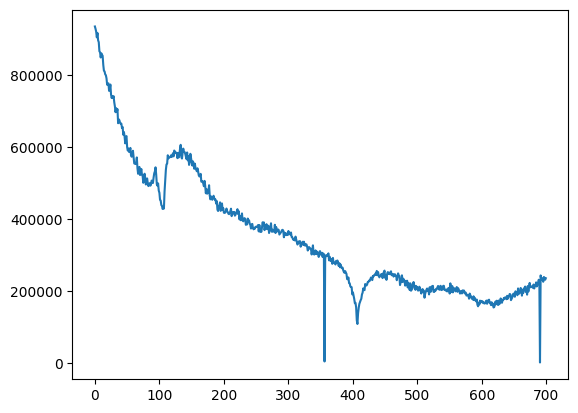

In [116]:
sums = []
for specind in range(700):
    sums.append(np.nansum(specs[:,4,specind]))

sums = np.array(sums)
plt.plot(sums)

In [ ]:
mv = np.empty((n_clusters,testvals.shape[0]),dtype=float)
for i in range(n_clusters):
    # w = np.nonzero(kmeans.labels_ == i)[0]

    if filter_idx[i]:
        mv[i,:] = testvals[:,i]
    else:
        mv[i,:] = np.nan
